# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Some 'theory': the groupby operation (split-apply-combine)

By "group by" we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [7]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [9]:
g = df.groupby('key')

## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/file/d/0B3G70MlBnCgKa0U4WFdWdGdVOFU/view?usp=sharing) and [`cast.csv`](https://drive.google.com/file/d/0B3G70MlBnCgKRzRmTWdQTUdjNnM/view?usp=sharing) and put them in the `/data` folder.

In [12]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [13]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

In [14]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [23]:
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [18]:
cast['year'] // 10 * 10

0          1980
1          2000
2          1990
3          2000
4          2010
           ... 
3333690    1990
3333691    1980
3333692    2000
3333693    2000
3333694    1990
Name: year, dtype: int64

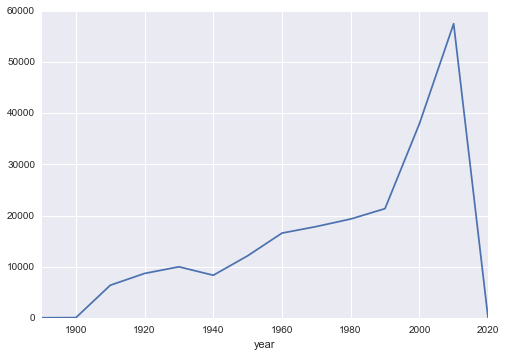

In [26]:
titles.groupby(titles['year'] // 10 * 10).size().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [31]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [28]:
n1 = cast[cast['n']==1]

In [30]:
decade = n1['year'] // 10 *10

In [36]:
result = n1.groupby([decade, 'type'])

In [41]:
cast['name'].value_counts()

Bess Flowers            808
Herman Hack             667
Sam (II) Harris         624
Lee Phelps              613
Frank O'Connor          598
                       ... 
David (XV) Rivera         1
Bagham Ojamel             1
Robert (V) Chan           1
Stuart (V) Henderson      1
Dave Mckell               1
dtype: int64

In [38]:
result['name'].nunique()

year  type   
1900  actor          5
      actress        1
1910  actor        825
      actress      651
1920  actor       1179
                 ...  
2000  actress     5323
2010  actor      12246
      actress     5955
2020  actor          3
      actress        1
Name: name, dtype: int64

In [35]:
result[1950]

type
actor      6388
actress    2813
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [42]:
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [43]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [44]:
df.groupby('key').transform(normalize)

,data
0,-1
1,-1
2,-1
3,0
4,0
5,0
6,1
7,1
8,1


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of number roles of actors and actresses to the total number of roles per decade and plot this for both in time (tip: you need to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.
</div>

In [45]:
decade = cast['year'] // 10 * 10

In [47]:
numbers = cast.groupby([decade, 'type'])['name'].nunique()

In [48]:
numbers

year  type   
1890  actor           2
      actress         1
1900  actor          48
      actress        16
1910  actor        6702
                  ...  
2000  actress    154054
2010  actor      323917
      actress    188183
2020  actor          28
      actress        12
Name: name, dtype: int64

In [51]:
ratios = numbers.groupby(level=0).transform(lambda group: group / group.sum())

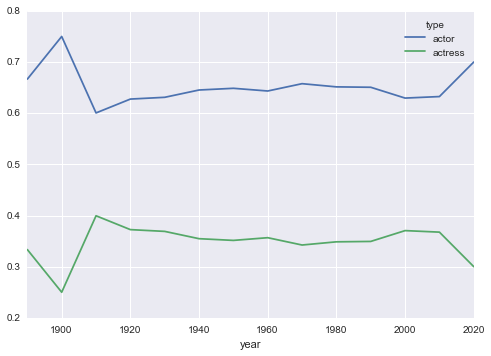

In [58]:
ratios.unstack(1).plot()

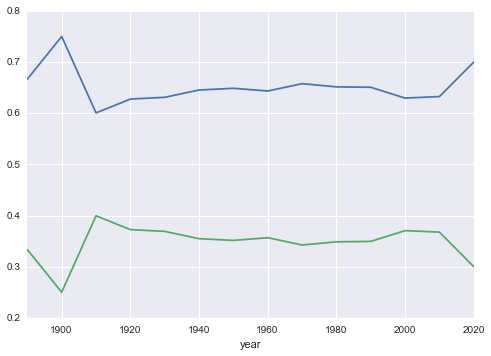

In [55]:
ratios[:, 'actor'].plot()
ratios[:, 'actress'].plot()

## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [59]:
titles.title.value_counts().head()

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Maya                    11
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>